# Titatic Exploratory Analysis 

The purpose of this notebook is to perform exploratory data analysis on the Kaggle Titanic competition. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
%pylab inline

pd.set_option('display.max_columns', 100)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Import data 
df_train = pd.read_csv('./train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# size
df_train.shape

(891, 12)

## Variable Discussion 

Based on the descriptions of the variables and competition description, let's set some expectations of trends we expect to see. 

- **PassengerId**: No impact on survival.
- **Pclass**: 1 is Upper Class and 3 is Lower Class. Medium impact on survival with Upper Class having a higher survival rate. 
- **Sex**: Low-medium impact on survival with females having a higher survival rate. 
- **Age**: High impact on survival with children and elderly having a higher survival rate. 
- **SibSp**: Indicates # of siblings / spouses aboard the titatic. Unsure of impact - need to dig into data. 
- **Parch**: Indicates # of children / parents aboard the titatic. Unsure of impact - need to dig into data. 
- **Ticket**: Negligible impact on survival as expecting all unique values. 
- **Fare**: Expected to be correlated to Pclass with medium impact on survival. 
- **Cabin**: Low impact expected as Lower Class passengers do not have a cabin - thus lots of missing data expected. 
- **Embarked**: Unsure of impact - need to dig into data. 

**Main Variables of Interest**: 
- Medium-High Impact: `Age`, `Pclass`, `Sex` 
- Unsure of Impact: `SibSp`, `Parch`, `Embarked` 

## Bivariate Variable Relationships 

Let's explore the relationship between `Survived` and other variables of interest. To avoid repetitive work, we need to identify predictors that are correlated with each other using a correlation matrix. 

<AxesSubplot:>

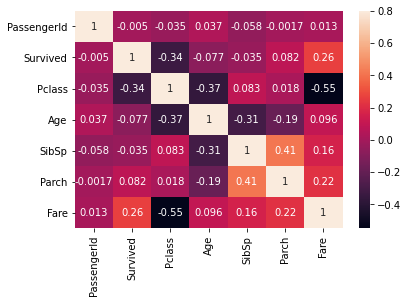

In [17]:
corr_mat = df_train.corr()
sns.heatmap(corr_mat, annot=True, vmax=0.8)

**Strong Predictors**: 
- As expected `Pclass` has a moderate correlation with `Survived` where Upper Class passengers have a higher survival rate. 

**Multicollinearity Variables**
- As expected, `Pclass` and `Fare` are moderately inversely correlated. Hence, depending on the machine learning algorithm chosen, one of these variables will be dropped from the analysis. 
- `Parch` and `SibSp` are positively correlated which makes sense given the close definition of the two variables. A new feature can possibly be engineered from the information represented in both the variables separately. 

### Numerical Variable Relationships

Numerical variables to explore: `Age`, `Fare` 

<AxesSubplot:xlabel='Survived', ylabel='Age'>

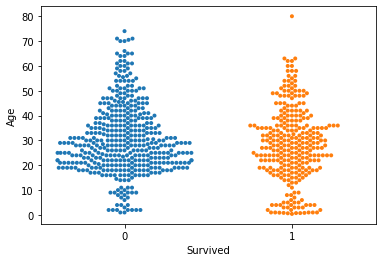

In [28]:
# sns.stripplot(x='Survived', y='Age', data=df_train)
# sns.FacedGrid(df_train, col='Survived', row='Age')
sns.swarmplot(x='Survived', y='Age', data=df_train, s=4)
# sns.violinplot(x='Survived', y='Age', data=df_train)

Unlike expectations, no trend is observed between higher ages and survival. A minor trend is seen for children with a higher proportion of them surviving compared to all other ages. 

[(-50.0, 300.0)]

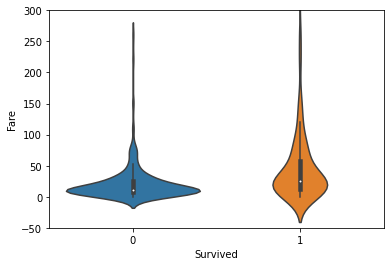

In [53]:
# sns.stripplot(x='Survived', y='Fare', data=df_train)   -not good
# sns.swarmplot(x='Survived', y='Fare', data=df_train, s=4)   # doesn't work
fig = sns.violinplot(x='Survived', y='Fare', data=df_train)    # seems best so far
fig.set(ylim=(-50, 300))
# fig.show()
# sns.barplot(x='Survived', y='Fare', data=df_train)    -meh 
# sns.boxplot(x='Survived', y='Fare', data=df_train)    - bad

In [ ]:
# Plot to dig further into splitters driving trends 
# sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=df_train, palette={'male': 'g', 'female':'m'})